In [1]:
# 基本的なライブラリ
import itertools
from tqdm import tqdm
import warnings
import numpy as np
import pandas as pd

# 描画ライブラリ
import matplotlib.pyplot as plt

# draw KM line
from lifelines import KaplanMeierFitter, CoxPHFitter

# config python file
import config
import functions

SEED = config.SEED
#INDEX_MICROARRAY = config.INDEX_MICROARRAY
functions.fix_seed(SEED)

# 最大表示列数の指定（ここでは50列を指定）
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 50)

%matplotlib inline

df_recurrenced = pd.read_pickle(
    config.INTERIM_PREPROCESSED_RECURRENCE_DIR + "/df_recurrenced4numeric.pkl"
)

/home/breast-cancer-analytics/notebooks/functions.py:196: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  y_train: pd.Series(),
/home/breast-cancer-analytics/notebooks/functions.py:198: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  y_val: pd.Series(),


# Draw KM line

In [14]:
def plot_KM(target_gene: str, subgroup, is_save: bool = False):
    ax = None
    plt.figure(figsize=(8, 6))
    plt.rcParams["font.size"] = 18
    kmf = KaplanMeierFitter()
    for val, group in df_tmp.groupby("target_gene_bin"):
        if val == 1:
            label = "gene expression value is over mean"
        elif val == -1:
            label = "gene expression value is under mean"

        kmf.fit(
            durations=group["RFS_MONTHS"],
            event_observed=group["RFS_STATUS"],
            label=label,
        )
        ax = (
            kmf.plot(show_censors=True, ax=ax)
            if ax
            else kmf.plot(show_censors=True, ax=ax)
        )

    functions.make_dir(config.FIGURES_LIFELINES_RECURRENCE_DIR)
    functions.make_dir("{0}/{1}".format(config.FIGURES_LIFELINES_RECURRENCE_DIR, subgroup))
    plt.title("{0}_lifeline analysis: {1}".format(subgroup, target_gene))
    ax.axvline(60, color="navy")
    ax.set_xlim([0, int(5 * 12 * 3)])
    ax.set_ylim([0, 1])
    plt.tight_layout()
    plt.savefig(
        "{0}/{1}/kmf_{2}.png".format(
            config.FIGURES_LIFELINES_RECURRENCE_DIR, subgroup, target_gene
        )
    ) if is_save else plt.show()

In [5]:
g_columns = pd.read_pickle(
    "./../data/interim/PREPROCESSED/RECURRENCE/df_merged4numeric.pkl"
)
subgroup = "LumA"
g = pd.DataFrame(g_columns[g_columns["CLAUDIN_SUBTYPE"] == subgroup])
g

,RFS_MONTHS,RFS_STATUS,CLAUDIN_SUBTYPE,THREEGENE,RERE,RNF165,PHF7,CIDEA,TENT2,SLC17A3,SDS,ATP6V1C2,F3,FAM71C,LIN52,PCOTH,GRM1,FXN,SLC9A1,PML,CD164,MOB3A,HGC6.1.1,OR1J2,GNG5,...,SHISA2,BCAT1,NCKAP1L,CATSPERD,AK098705,PSMC3IP,TEAD1,TTC41P,GRHPR,CHRNB1,RAB4B-EGLN2,TBC1D4,TSPAN11,ANGPTL2,ENOX1,LOC283104,VN1R4,TRPV5,UGGT1,CR590356,VPS72,CSMD3,CC2D1A,IGSF9,FAM71A
MB-0002,83.52,False,LumA,ER+_HER2-_High_Prolif,9.013876,5.748717,5.611212,6.199492,8.341091,5.789506,5.700974,5.495295,6.098949,5.589824,6.952007,5.545206,5.579463,6.341935,9.307305,6.132436,6.400910,7.178274,5.697691,5.434639,8.571327,...,9.409817,6.094350,5.683700,4.888335,5.615278,6.447777,5.950548,5.502117,8.261487,6.706565,10.186566,6.324112,5.375676,8.895600,5.515844,5.442257,5.303871,5.507905,7.612797,5.519225,7.988643,5.194247,6.328059,6.938685,5.604560
MB-0036,123.32,True,LumA,ER+_HER2-_Low_Prolif,9.394619,7.558168,6.627111,7.013846,7.676682,5.550874,6.113966,5.139766,5.795661,5.415040,6.270022,5.458955,5.532467,6.075860,8.418717,6.117859,5.441285,6.777553,5.333450,5.232493,8.054196,...,6.705613,5.791813,6.115948,5.162214,5.255158,6.319191,5.325237,5.289706,7.785597,6.539222,11.289986,5.823329,5.453706,8.397458,5.953766,5.336609,5.511440,5.381504,7.632555,6.017683,8.311183,5.164221,6.202657,6.677702,5.042850
MB-0046,13.36,True,LumA,NaN,8.638829,6.454911,5.754734,5.773949,8.690725,5.562683,6.325738,5.643373,5.727588,5.283550,6.731067,5.727799,5.633394,6.081742,9.915199,6.410846,6.085763,6.677113,8.672517,5.621669,8.942263,...,8.531751,6.185497,6.362046,5.328415,5.399564,6.429713,5.594482,5.420410,8.370030,6.823267,10.754042,6.591425,5.435043,7.317962,5.659830,5.260467,5.438251,5.396792,7.715507,5.863624,8.488727,5.307310,6.071653,7.837516,5.390555
MB-0059,158.78,False,LumA,ER+_HER2-_High_Prolif,8.726861,5.253296,5.739219,5.799649,8.422187,5.576967,5.865278,5.534159,5.575924,5.268586,6.352920,5.652222,5.251917,5.969097,9.304066,5.882714,6.327191,6.260535,5.337421,5.602564,8.550786,...,9.156114,6.927658,6.395548,5.182000,5.332025,6.092742,5.927851,5.521791,7.647746,6.209405,10.799236,6.384084,5.330030,8.602844,5.878179,5.338719,5.544374,5.458858,7.482517,5.762725,8.504975,5.496777,6.369656,7.124256,5.792130
MB-0068,101.78,False,LumA,NaN,8.841997,6.042170,5.789041,5.972394,8.579305,5.189828,6.361446,5.281109,6.737448,5.478255,5.884095,5.689974,5.434211,6.076688,8.668383,6.019048,8.399333,6.394310,5.439266,5.622975,9.374945,...,7.408057,6.407071,6.267506,5.311785,5.424034,5.779725,5.429207,5.563503,8.434033,6.500776,10.305648,7.473152,5.149494,7.660887,5.632401,5.424136,5.350277,5.518672,7.145642,5.593637,8.155988,5.316170,6.376459,6.211250,5.524554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MB-7278,238.13,False,LumA,ER+_HER2-_Low_Prolif,9.432313,5.807744,6.289239,6.042836,8.379718,5.738911,5.835017,5.424203,7.335966,5.361792,5.642379,5.861607,5.310340,6.337874,9.560307,7.273884,6.614329,7.088134,5.407207,5.608880,8.605340,...,8.470887,5.787717,6.250953,5.484696,5.303719,5.550965,5.268720,5.413206,8.388825,6.512066,10.068320,6.222385,5.353387,8.183584,5.341985,5.536791,5.372138,5.450918,8.216327,6.216954,7.776195,5.103949,6.070704,6.761869,5.793661
MB-7280,192.96,False,LumA,ER+_HER2-_High_Prolif,9.228473,5.950148,6.078786,7.422013,8.427873,5.636084,5.997610,5.159495,5.897850,5.466062,6.076633,5.699028,5.358508,5.969491,8.832875,6.377044,5.907577,6.877286,5.339629,5.616009,8.872406,...,8.161912,5.494045,6.217762,5.451459,5.313648,6.755583,5.254549,5.357403,8.605556,6.307420,11.243924,6.399555,5.466846,7.634653,5.634303,5.493892,5.295118,5.557397,7.228171,6.115613,7.929556,5.397471,6.316897,6.491419,5.519307
MB-7284,146.97,True,LumA,ER+_HER2-_Low_Prolif,8.395424,6.053629,6.045775,7.517484,8.268369,5.701243,6.413652,5.828383,5.703769,5.306335,6.474204,5.683681,5.420229,6.246592,9.194456,6.174171,5.880662,6.8670

## データ読み込み

In [4]:
"""
patient_columns = ["RFS_MONTHS", "RFS_STATUS", "CLAUDIN_SUBTYPE"]
subgroup = "LumA"

gene_columns = pd.read_pickle(
    "./../data/interim/PREPROCESSED/RECURRENCE/CLAUDIN_SUBTYPE/{0}/preprocess4numeric_pca43/val_set/train/X.pkl".format(
        subgroup
    )
).columns.to_list()
analytsis_columns = patient_columns + gene_columns

df_patient = pd.read_pickle(config.INTERIM_PREPROCESSED_RECURRENCE_DIR + "/df_MB.pkl")[
    patient_columns
]
df_patient["RFS_STATUS"] = df_patient["RFS_STATUS"].replace(
    {"1:Recurred": 1, "0:Not Recurred": 0}
)
df_gene_expressions = pd.read_pickle(
    config.INTERIM_PREPROCESSED_RECURRENCE_DIR + "/df_gene_expressions.pkl"
)
df_merged = pd.merge(df_patient, df_gene_expressions, left_index=True, right_index=True)
"""
df_merged = pd.read_pickle(
    "./../data/interim/PREPROCESSED/RECURRENCE/df_merged4numeric.pkl"
)

"""
# manual
df_lifeline_analysis = df_merged[df_merged["CLAUDIN_SUBTYPE"] == subgroup][
    analytsis_columns
].dropna()
"""

subgroup = "LumA"

df_sub =  pd.DataFrame(df_merged[df_merged["CLAUDIN_SUBTYPE"] == subgroup])


gene_columns = df_sub.drop(["RFS_MONTHS","RFS_STATUS","CLAUDIN_SUBTYPE","THREEGENE"], axis=1).columns.to_list()

df_tmp = df_sub.drop(["CLAUDIN_SUBTYPE","THREEGENE"], axis=1).copy()
df_tmp

,RFS_MONTHS,RFS_STATUS,RERE,RNF165,PHF7,CIDEA,TENT2,SLC17A3,SDS,ATP6V1C2,F3,FAM71C,LIN52,PCOTH,GRM1,FXN,SLC9A1,PML,CD164,MOB3A,HGC6.1.1,OR1J2,GNG5,TAF15,EXTL3,...,SHISA2,BCAT1,NCKAP1L,CATSPERD,AK098705,PSMC3IP,TEAD1,TTC41P,GRHPR,CHRNB1,RAB4B-EGLN2,TBC1D4,TSPAN11,ANGPTL2,ENOX1,LOC283104,VN1R4,TRPV5,UGGT1,CR590356,VPS72,CSMD3,CC2D1A,IGSF9,FAM71A
MB-0002,83.52,False,9.013876,5.748717,5.611212,6.199492,8.341091,5.789506,5.700974,5.495295,6.098949,5.589824,6.952007,5.545206,5.579463,6.341935,9.307305,6.132436,6.400910,7.178274,5.697691,5.434639,8.571327,9.248432,6.969206,...,9.409817,6.094350,5.683700,4.888335,5.615278,6.447777,5.950548,5.502117,8.261487,6.706565,10.186566,6.324112,5.375676,8.895600,5.515844,5.442257,5.303871,5.507905,7.612797,5.519225,7.988643,5.194247,6.328059,6.938685,5.604560
MB-0036,123.32,True,9.394619,7.558168,6.627111,7.013846,7.676682,5.550874,6.113966,5.139766,5.795661,5.415040,6.270022,5.458955,5.532467,6.075860,8.418717,6.117859,5.441285,6.777553,5.333450,5.232493,8.054196,10.479601,7.165438,...,6.705613,5.791813,6.115948,5.162214,5.255158,6.319191,5.325237,5.289706,7.785597,6.539222,11.289986,5.823329,5.453706,8.397458,5.953766,5.336609,5.511440,5.381504,7.632555,6.017683,8.311183,5.164221,6.202657,6.677702,5.042850
MB-0046,13.36,True,8.638829,6.454911,5.754734,5.773949,8.690725,5.562683,6.325738,5.643373,5.727588,5.283550,6.731067,5.727799,5.633394,6.081742,9.915199,6.410846,6.085763,6.677113,8.672517,5.621669,8.942263,10.464401,6.263294,...,8.531751,6.185497,6.362046,5.328415,5.399564,6.429713,5.594482,5.420410,8.370030,6.823267,10.754042,6.591425,5.435043,7.317962,5.659830,5.260467,5.438251,5.396792,7.715507,5.863624,8.488727,5.307310,6.071653,7.837516,5.390555
MB-0059,158.78,False,8.726861,5.253296,5.739219,5.799649,8.422187,5.576967,5.865278,5.534159,5.575924,5.268586,6.352920,5.652222,5.251917,5.969097,9.304066,5.882714,6.327191,6.260535,5.337421,5.602564,8.550786,10.450488,7.181568,...,9.156114,6.927658,6.395548,5.182000,5.332025,6.092742,5.927851,5.521791,7.647746,6.209405,10.799236,6.384084,5.330030,8.602844,5.878179,5.338719,5.544374,5.458858,7.482517,5.762725,8.504975,5.496777,6.369656,7.124256,5.792130
MB-0068,101.78,False,8.841997,6.042170,5.789041,5.972394,8.579305,5.189828,6.361446,5.281109,6.737448,5.478255,5.884095,5.689974,5.434211,6.076688,8.668383,6.019048,8.399333,6.394310,5.439266,5.622975,9.374945,9.609713,6.605623,...,7.408057,6.407071,6.267506,5.311785,5.424034,5.779725,5.429207,5.563503,8.434033,6.500776,10.305648,7.473152,5.149494,7.660887,5.632401,5.424136,5.350277,5.518672,7.145642,5.593637,8.155988,5.316170,6.376459,6.211250,5.524554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MB-7278,238.13,False,9.432313,5.807744,6.289239,6.042836,8.379718,5.738911,5.835017,5.424203,7.335966,5.361792,5.642379,5.861607,5.310340,6.337874,9.560307,7.273884,6.614329,7.088134,5.407207,5.608880,8.605340,9.894345,7.082542,...,8.470887,5.787717,6.250953,5.484696,5.303719,5.550965,5.268720,5.413206,8.388825,6.512066,10.068320,6.222385,5.353387,8.183584,5.341985,5.536791,5.372138,5.450918,8.216327,6.216954,7.776195,5.103949,6.070704,6.761869,5.793661
MB-7280,192.96,False,9.228473,5.950148,6.078786,7.422013,8.427873,5.636084,5.997610,5.159495,5.897850,5.466062,6.076633,5.699028,5.358508,5.969491,8.832875,6.377044,5.907577,6.877286,5.339629,5.616009,8.872406,10.190647,7.124314,...,8.161912,5.494045,6.217762,5.451459,5.313648,6.755583,5.254549,5.357403,8.605556,6.307420,11.243924,6.399555,5.466846,7.634653,5.634303,5.493892,5.295118,5.557397,7.228171,6.115613,7.929556,5.397471,6.316897,6.491419,5.519307
MB-7284,146.97,True,8.395424,6.053629,6.045775,7.517484,8.268369,5.701243,6.413652,5.828383,5.703769,5.306335,6.474204,5.683681,5.420229,6.246592,9.194456,6.174171,5.880662,6.867023,5.413647,5.589025,7.417589,10.345125,6.902475,...,9.991215

In [27]:
#df_tmp["RPA2"]
df_tmp["LCE2A"]

MB-0002    5.314128
MB-0036    5.367968
MB-0046    5.414055
MB-0059    5.470466
MB-0068    5.396572
             ...   
MB-7278    5.154501
MB-7280    5.488786
MB-7284    5.448712
MB-7293    5.206711
MB-7295    5.348455
Name: LCE2A, Length: 690, dtype: float64

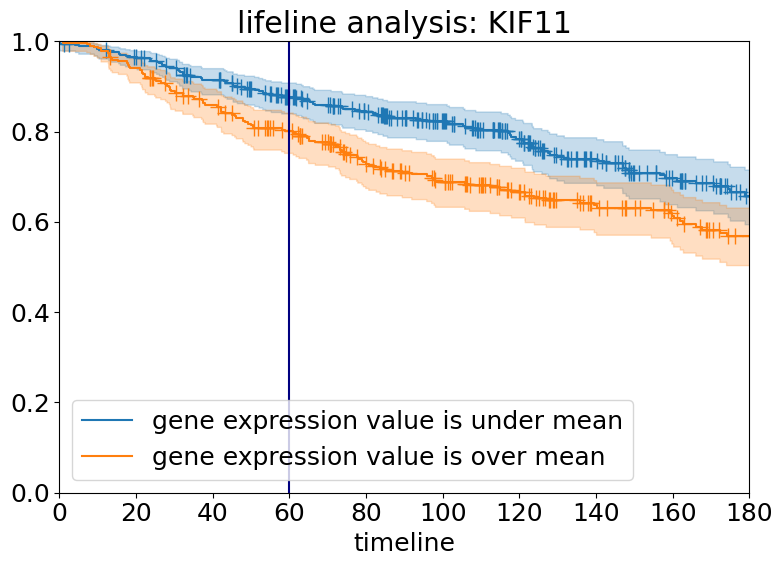

In [29]:
df_genes_threshold = df_tmp[gene_columns].apply("mean")

target = "KIF11"
analysis_targets = [target]
for gene_column in gene_columns:
    if gene_column in analysis_targets:
        df_tmp["target_gene_bin"] = df_tmp[gene_column].apply(
            lambda x: 1 if x >= df_genes_threshold[gene_column] else -1
        )
        plot_KM(gene_column, subgroup, True)

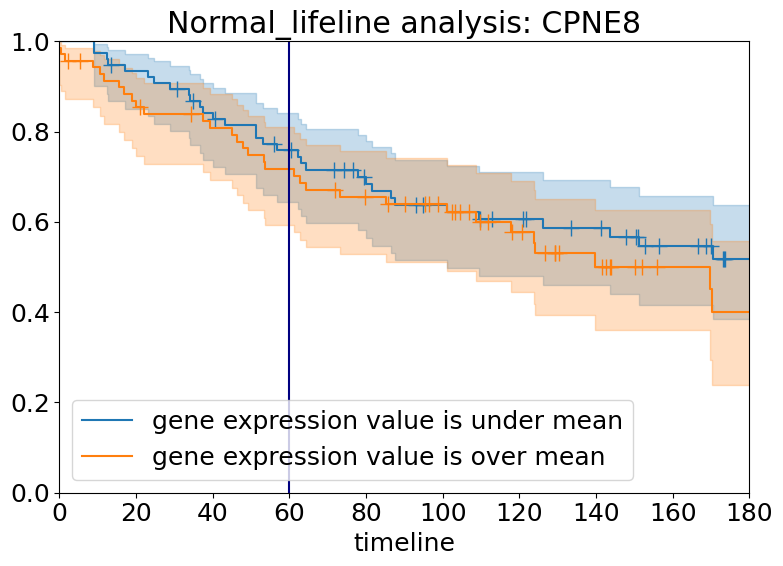

In [25]:
df_merged = pd.read_pickle(
    "./../data/interim/PREPROCESSED/RECURRENCE/df_merged4numeric.pkl"
)
subgroup = "Normal"

df_sub =  pd.DataFrame(df_merged[df_merged["CLAUDIN_SUBTYPE"] == subgroup])


gene_columns = df_sub.drop(["RFS_MONTHS","RFS_STATUS","CLAUDIN_SUBTYPE","THREEGENE"], axis=1).columns.to_list()

df_tmp = df_sub.drop(["CLAUDIN_SUBTYPE","THREEGENE"], axis=1).copy()

df_genes_threshold = df_tmp[gene_columns].apply("mean")

target = "CPNE8"
analysis_targets = [target]
for gene_column in gene_columns:
    if gene_column in analysis_targets:
        df_tmp["target_gene_bin"] = df_tmp[gene_column].apply(
            lambda x: 1 if x >= df_genes_threshold[gene_column] else -1
        )
        plot_KM(gene_column, subgroup, True)

In [11]:
df_tmp["target_gene_bin"]

MB-0035    1
MB-0079   -1
MB-0113    1
MB-0129    1
MB-0148    1
          ..
MB-7262   -1
MB-7273    1
MB-7275   -1
MB-7279    1
MB-7281   -1
Name: target_gene_bin, Length: 223, dtype: int64

In [11]:
df_merged = pd.read_pickle(
    "./../data/interim/PREPROCESSED/RECURRENCE/df_merged4numeric.pkl"
)

df_alltmp = df_merged.drop(["CLAUDIN_SUBTYPE","THREEGENE"], axis=1).copy()
df_alltmp

,RFS_MONTHS,RFS_STATUS,RERE,RNF165,PHF7,CIDEA,TENT2,SLC17A3,SDS,ATP6V1C2,F3,FAM71C,LIN52,PCOTH,GRM1,FXN,SLC9A1,PML,CD164,MOB3A,HGC6.1.1,OR1J2,GNG5,TAF15,EXTL3,...,SHISA2,BCAT1,NCKAP1L,CATSPERD,AK098705,PSMC3IP,TEAD1,TTC41P,GRHPR,CHRNB1,RAB4B-EGLN2,TBC1D4,TSPAN11,ANGPTL2,ENOX1,LOC283104,VN1R4,TRPV5,UGGT1,CR590356,VPS72,CSMD3,CC2D1A,IGSF9,FAM71A
MB-0000,138.65,False,9.738092,6.469688,5.652674,11.558869,8.340484,5.648494,5.336235,5.468668,7.070649,5.477154,6.811309,5.440853,5.361170,5.823306,8.809831,6.790593,6.141047,6.499117,5.669507,5.469022,8.091453,10.390643,6.873466,...,6.155340,6.285499,6.547422,5.353135,5.198876,5.901473,5.610397,5.515762,8.139151,6.476209,10.232505,7.311327,5.458092,9.677952,5.918239,5.295203,5.474224,5.415184,7.021679,5.947334,8.010657,5.299815,6.235804,5.947404,5.133576
MB-0002,83.52,False,9.013876,5.748717,5.611212,6.199492,8.341091,5.789506,5.700974,5.495295,6.098949,5.589824,6.952007,5.545206,5.579463,6.341935,9.307305,6.132436,6.400910,7.178274,5.697691,5.434639,8.571327,9.248432,6.969206,...,9.409817,6.094350,5.683700,4.888335,5.615278,6.447777,5.950548,5.502117,8.261487,6.706565,10.186566,6.324112,5.375676,8.895600,5.515844,5.442257,5.303871,5.507905,7.612797,5.519225,7.988643,5.194247,6.328059,6.938685,5.604560
MB-0005,151.28,True,7.963493,5.553056,5.793398,6.489781,8.862815,5.566713,7.233671,5.537530,6.964546,5.255454,6.480061,5.790445,5.462634,5.807004,8.477327,5.572601,8.575001,6.469047,5.329956,5.575368,8.016276,9.073888,6.592135,...,9.094121,7.387453,6.217209,5.313808,5.508167,6.076896,5.747801,5.368297,7.731911,6.944685,9.954702,7.222594,5.475184,8.972083,5.350242,5.368716,5.370394,5.314009,6.619220,5.496590,8.044471,5.306294,6.306927,7.397672,5.645597
MB-0006,162.76,False,8.177157,5.391160,5.807604,5.319779,8.693784,5.539252,6.124384,6.657355,6.409554,5.289307,5.987913,5.393475,5.282728,5.985588,8.101386,5.808433,9.164529,6.487679,5.343103,5.638589,8.323978,9.937245,6.181493,...,10.039994,7.731911,6.033998,5.228991,5.324400,5.650472,5.579526,5.303998,8.301195,6.682616,10.088769,7.053031,5.516231,8.664307,5.650978,5.295628,5.694697,5.410028,6.966482,5.600679,7.527300,5.197607,6.515638,6.175716,5.354582
MB-0008,18.55,True,8.050127,5.530582,5.934570,8.787583,8.055626,5.646685,7.155642,5.878104,5.798117,5.297733,6.675580,6.598310,5.328773,6.200995,9.301414,6.182025,5.904271,6.426740,5.402129,5.486989,8.068202,9.619406,6.609742,...,5.929184,6.289241,6.215874,5.322069,5.136661,6.403137,5.904885,5.473140,8.007261,6.438823,11.244345,5.926732,5.385006,8.141539,5.527755,5.192858,5.474929,5.389733,6.942461,6.707482,8.115359,5.254136,6.323751,6.272568,5.030636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MB-7295,194.28,False,8.589374,6.002483,5.802742,5.474550,8.251690,5.546402,6.532649,5.535139,6.282020,5.440358,6.486128,6.074573,5.281556,6.058330,8.722802,5.891944,6.315133,6.707501,5.382979,5.673238,8.492533,10.412285,6.707874,...,8.989206,7.504936,6.538325,5.394435,5.324246,6.132406,5.471503,5.372043,8.455392,6.864004,10.303605,6.686198,5.593446,9.987552,5.722099,5.240904,5.521765,5.646490,7.536208,5.824289,8.314500,5.337300,6.278034,6.923887,5.168953
MB-7296,16.09,True,8.402660,6.104059,5.256086,6.659117,8.641838,5.522964,7.102716,5.353956,5.546199,5.289827,6.491748,5.865518,5.564988,6.132467,8.814733,6.236368,6.257710,6.223216,5.903257,5.256140,8.653936,9.089322,6.204450,...,6.453953,6.804857,6.687314,5.304696,5.396539,6.221306,5.315972,5.300309,8.523291,6.031903,11.353435,6.623708,4.964861,8.441388,5.453321,5.171671,5.441341,5.612519,7.709596,5.899345,8.105717,5.397931,6.325456,6.524268,5.252479
MB-7297,121.18,True,8.236918,5.402870,5.571897,5.439574,8.979375,5.804127,6.593890,5.353883,5.705768,5.531300,6.906297,6.116738,5.132988,6.031882,8.530870,5.744546,6.865706,6.589864,5.595558,5.369984,9.108238,9.574617,6.486472,...,8.233227,6.7

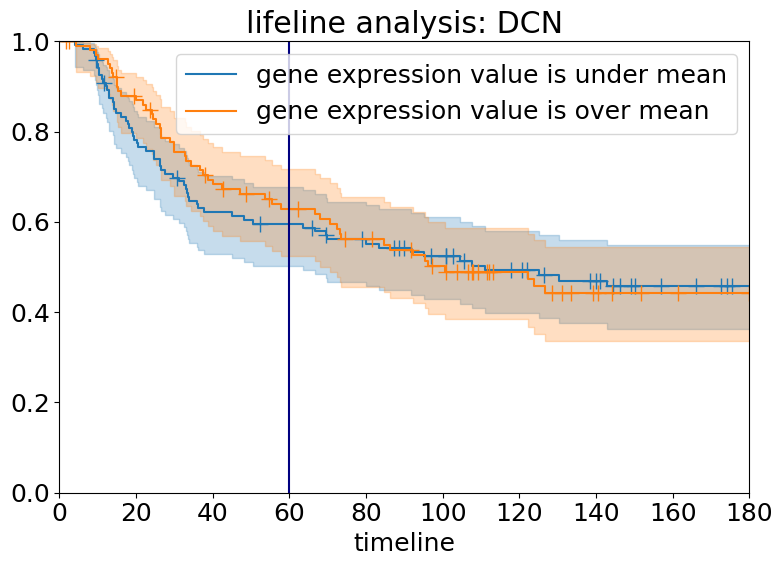

In [13]:
df_genes_threshold = df_alltmp[gene_columns].apply("mean")
subgroup = "all"
target = "DCN"
analysis_targets = [target]
for gene_column in gene_columns:
    if gene_column in analysis_targets:
        df_tmp["target_gene_bin"] = df_alltmp[gene_column].apply(
            lambda x: 1 if x >= df_genes_threshold[gene_column] else -1
        )
        plot_KM(gene_column, subgroup, True)

In [ ]:
a = pd.DataFrame(df_genes_threshold)
a.loc["RPA2"]
a

In [8]:
df_tmp

,RFS_MONTHS,RFS_STATUS,RERE,RNF165,PHF7,CIDEA,TENT2,SLC17A3,SDS,ATP6V1C2,F3,FAM71C,LIN52,PCOTH,GRM1,FXN,SLC9A1,PML,CD164,MOB3A,HGC6.1.1,OR1J2,GNG5,TAF15,EXTL3,...,BCAT1,NCKAP1L,CATSPERD,AK098705,PSMC3IP,TEAD1,TTC41P,GRHPR,CHRNB1,RAB4B-EGLN2,TBC1D4,TSPAN11,ANGPTL2,ENOX1,LOC283104,VN1R4,TRPV5,UGGT1,CR590356,VPS72,CSMD3,CC2D1A,IGSF9,FAM71A,target_gene_bin
MB-0002,83.52,False,9.013876,5.748717,5.611212,6.199492,8.341091,5.789506,5.700974,5.495295,6.098949,5.589824,6.952007,5.545206,5.579463,6.341935,9.307305,6.132436,6.400910,7.178274,5.697691,5.434639,8.571327,9.248432,6.969206,...,6.094350,5.683700,4.888335,5.615278,6.447777,5.950548,5.502117,8.261487,6.706565,10.186566,6.324112,5.375676,8.895600,5.515844,5.442257,5.303871,5.507905,7.612797,5.519225,7.988643,5.194247,6.328059,6.938685,5.604560,1
MB-0036,123.32,True,9.394619,7.558168,6.627111,7.013846,7.676682,5.550874,6.113966,5.139766,5.795661,5.415040,6.270022,5.458955,5.532467,6.075860,8.418717,6.117859,5.441285,6.777553,5.333450,5.232493,8.054196,10.479601,7.165438,...,5.791813,6.115948,5.162214,5.255158,6.319191,5.325237,5.289706,7.785597,6.539222,11.289986,5.823329,5.453706,8.397458,5.953766,5.336609,5.511440,5.381504,7.632555,6.017683,8.311183,5.164221,6.202657,6.677702,5.042850,-1
MB-0046,13.36,True,8.638829,6.454911,5.754734,5.773949,8.690725,5.562683,6.325738,5.643373,5.727588,5.283550,6.731067,5.727799,5.633394,6.081742,9.915199,6.410846,6.085763,6.677113,8.672517,5.621669,8.942263,10.464401,6.263294,...,6.185497,6.362046,5.328415,5.399564,6.429713,5.594482,5.420410,8.370030,6.823267,10.754042,6.591425,5.435043,7.317962,5.659830,5.260467,5.438251,5.396792,7.715507,5.863624,8.488727,5.307310,6.071653,7.837516,5.390555,1
MB-0059,158.78,False,8.726861,5.253296,5.739219,5.799649,8.422187,5.576967,5.865278,5.534159,5.575924,5.268586,6.352920,5.652222,5.251917,5.969097,9.304066,5.882714,6.327191,6.260535,5.337421,5.602564,8.550786,10.450488,7.181568,...,6.927658,6.395548,5.182000,5.332025,6.092742,5.927851,5.521791,7.647746,6.209405,10.799236,6.384084,5.330030,8.602844,5.878179,5.338719,5.544374,5.458858,7.482517,5.762725,8.504975,5.496777,6.369656,7.124256,5.792130,1
MB-0068,101.78,False,8.841997,6.042170,5.789041,5.972394,8.579305,5.189828,6.361446,5.281109,6.737448,5.478255,5.884095,5.689974,5.434211,6.076688,8.668383,6.019048,8.399333,6.394310,5.439266,5.622975,9.374945,9.609713,6.605623,...,6.407071,6.267506,5.311785,5.424034,5.779725,5.429207,5.563503,8.434033,6.500776,10.305648,7.473152,5.149494,7.660887,5.632401,5.424136,5.350277,5.518672,7.145642,5.593637,8.155988,5.316170,6.376459,6.211250,5.524554,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MB-7278,238.13,False,9.432313,5.807744,6.289239,6.042836,8.379718,5.738911,5.835017,5.424203,7.335966,5.361792,5.642379,5.861607,5.310340,6.337874,9.560307,7.273884,6.614329,7.088134,5.407207,5.608880,8.605340,9.894345,7.082542,...,5.787717,6.250953,5.484696,5.303719,5.550965,5.268720,5.413206,8.388825,6.512066,10.068320,6.222385,5.353387,8.183584,5.341985,5.536791,5.372138,5.450918,8.216327,6.216954,7.776195,5.103949,6.070704,6.761869,5.793661,-1
MB-7280,192.96,False,9.228473,5.950148,6.078786,7.422013,8.427873,5.636084,5.997610,5.159495,5.897850,5.466062,6.076633,5.699028,5.358508,5.969491,8.832875,6.377044,5.907577,6.877286,5.339629,5.616009,8.872406,10.190647,7.124314,...,5.494045,6.217762,5.451459,5.313648,6.755583,5.254549,5.357403,8.605556,6.307420,11.243924,6.399555,5.466846,7.634653,5.634303,5.493892,5.295118,5.557397,7.228171,6.115613,7.929556,5.397471,6.316897,6.491419,5.519307,1
MB-7284,146.97,True,8.395424,6.053629,6.045775,7.517484,8.268369,5.701243,6.413652,5.828383,5.703769,5.306335,6.474204,5.683681,5.420229,6.246592,9.194456,6.174171,5.880662,6.867023,5.413647,5.589025,7.417589,10.345125,6.902475,...,6.577060,5.985230,5.314520,5.286700,6.463520,5

In [12]:
 df_genes_threshold

RERE      9.216922
RNF165    6.405236
PHF7      6.065671
CIDEA     6.599333
TENT2     8.418072
            ...   
VPS72     8.165330
CSMD3     5.348214
CC2D1A    6.349367
IGSF9     7.053411
FAM71A    5.315133
Length: 20603, dtype: float64

Iteration 1: norm_delta = 0.20327, step_size = 0.9500, log_lik = -1364.53663, newton_decrement = 4.71845, seconds_since_start = 0.0
Iteration 2: norm_delta = 0.00560, step_size = 0.9500, log_lik = -1359.89438, newton_decrement = 0.00373, seconds_since_start = 0.0
Iteration 3: norm_delta = 0.00028, step_size = 0.9500, log_lik = -1359.89066, newton_decrement = 0.00001, seconds_since_start = 0.0
Iteration 4: norm_delta = 0.00000, step_size = 1.0000, log_lik = -1359.89065, newton_decrement = 0.00000, seconds_since_start = 0.0
Convergence success after 4 iterations.


<lifelines.CoxPHFitter: fitted with 690 total observations, 462 right-censored observations>
             duration col = 'RFS_MONTHS'
                event col = 'RFS_STATUS'
      baseline estimation = breslow
   number of observations = 690
number of events observed = 228
   partial log-likelihood = -1359.89
         time fit was run = 2023-06-26 11:32:22 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
KIF11       0.52       1.68       0.17             0.19             0.85                 1.21                 2.34

            cmp to    z      p   -log2(p)
covariate                                
KIF11         0.00 3.07 <0.005       8.86
---
Concordance = 0.58
Partial AIC = 2721.78
log-likelihood ratio test = 9.29 on 1 df
-log2(p) of ll-ratio test = 8.76

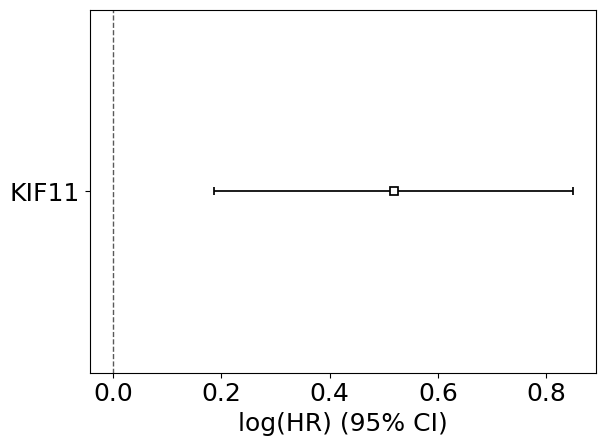

In [30]:
patient_columns = ["RFS_MONTHS", "RFS_STATUS"]


cph = CoxPHFitter()
cph.fit(
    df_tmp[analysis_targets + patient_columns],
    duration_col="RFS_MONTHS",
    event_col="RFS_STATUS",
    show_progress=True,
)
plt.rcParams["font.size"] = 18
cph.print_summary()
cph.plot()
plt.tight_layout()
functions.make_dir("{0}/LumA".format(config.FIGURES_LIFELINES_RECURRENCE_DIR))
plt.savefig("{0}/LumA/cph_{1}.png".format(config.FIGURES_LIFELINES_RECURRENCE_DIR,target))

# Landmark model

In [15]:
"""
patient_columns = ["RFS_MONTHS", "RFS_STATUS", "CLAUDIN_SUBTYPE"]
subgroup = "LumA"

gene_columns = pd.read_pickle(
    "./../data/interim/PREPROCESSED/RECURRENCE/CROSS/CLAUDIN_SUBTYPE/mrmr_std_smote/train_val/X_{0}.pkl".format(
        subgroup
    )
).columns.to_list()
analytsis_columns = patient_columns + gene_columns

df_patient = pd.read_pickle(config.INTERIM_PREPROCESSED_RECURRENCE_DIR + "/df_MB.pkl")[
    patient_columns
]
df_patient["RFS_STATUS"] = df_patient["RFS_STATUS"].replace(
    {"1:Recurred": 1, "0:Not Recurred": 0}
)
df_gene_expressions = pd.read_pickle(
    config.INTERIM_PREPROCESSED_RECURRENCE_DIR + "/df_gene_expressions.pkl"
)
df_merged = pd.merge(df_patient, df_gene_expressions, left_index=True, right_index=True)

# manual
df_lifeline_analysis = df_merged[df_merged["CLAUDIN_SUBTYPE"] == subgroup][
    analytsis_columns
].dropna()
df_tmp = df_lifeline_analysis.drop("CLAUDIN_SUBTYPE", axis=1).copy()
"""
df_tmp = df_tmp[df_tmp["RFS_MONTHS"] > 5 * 12]

In [16]:
def plot_KM(target_gene: str, subgroup, is_save: bool = False):
    ax = None
    plt.figure(figsize=(8, 6))
    plt.rcParams["font.size"] = 18
    kmf = KaplanMeierFitter()
    for val, group in df_tmp.groupby("target_gene_bin"):
        if val == 1:
            label = "gene expression is over medium"
        elif val == -1:
            label = "gene expression is under medium"

        kmf.fit(
            durations=group["RFS_MONTHS"],
            event_observed=group["RFS_STATUS"],
            label=label,
        )
        ax = (
            kmf.plot(show_censors=True, ax=ax)
            if ax
            else kmf.plot(show_censors=True, ax=ax)
        )
    functions.make_dir(config.FIGURES_LIFELINES_RECURRENCE_DIR)

    plt.title("landmark analysis: {0}".format(target_gene))
    # ax.axvline(60, color="navy")
    ax.set_xlim([5 * 12, 5 * 12 * 5])
    ax.set_ylim([0, 1])
    plt.tight_layout()
    plt.savefig(
        "{0}/{1}/kmf_landmark_{2}.png".format(
            config.FIGURES_LIFELINES_RECURRENCE_DIR, subgroup, target_gene
        )
    ) if is_save else plt.show()

/tmp/ipykernel_26/3108541395.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp["target_gene_bin"] = df_tmp[gene_column].apply(


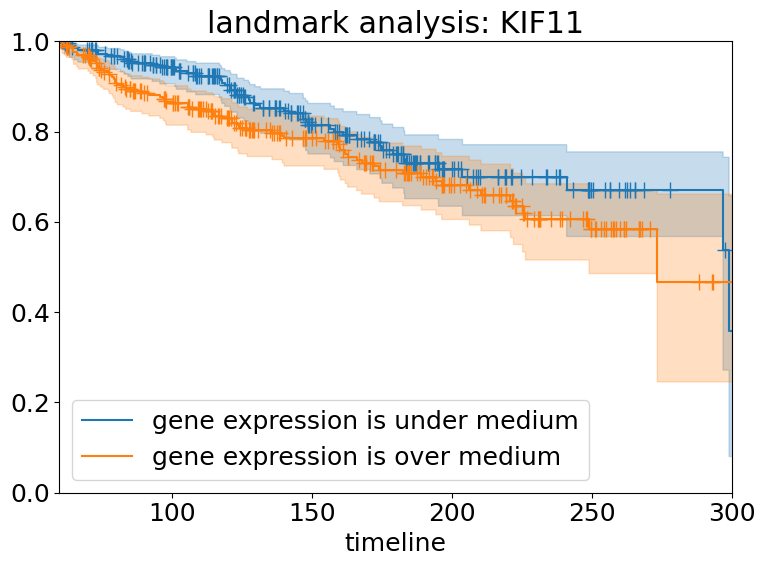

In [17]:
df_genes_threshold = df_tmp[gene_columns].apply("median")

#analysis_targets = ["RPA2"]
analysis_targets = ["KIF11"]
for gene_column in gene_columns:
    if gene_column in analysis_targets:
        df_tmp["target_gene_bin"] = df_tmp[gene_column].apply(
            lambda x: 1 if x >= df_genes_threshold[gene_column] else -1
        )
        plot_KM(gene_column, subgroup, True)

Iteration 1: norm_delta = 0.07671, step_size = 0.9500, log_lik = -663.70322, newton_decrement = 0.33375, seconds_since_start = 0.0
Iteration 2: norm_delta = 0.00433, step_size = 0.9500, log_lik = -663.36905, newton_decrement = 0.00105, seconds_since_start = 0.0
Iteration 3: norm_delta = 0.00022, step_size = 0.9500, log_lik = -663.36800, newton_decrement = 0.00000, seconds_since_start = 0.0
Iteration 4: norm_delta = 0.00000, step_size = 1.0000, log_lik = -663.36800, newton_decrement = 0.00000, seconds_since_start = 0.0
Convergence success after 4 iterations.


/root/miniconda3/envs/breast-cancer-analytics/lib/python3.8/site-packages/lifelines/utils/printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return summary_df[columns].to_latex(float_format="%." + str(self.decimals) + "f")


<lifelines.CoxPHFitter: fitted with 514 total observations, 395 right-censored observations>
             duration col = 'RFS_MONTHS'
                event col = 'RFS_STATUS'
      baseline estimation = breslow
   number of observations = 514
number of events observed = 119
   partial log-likelihood = -663.37
         time fit was run = 2022-10-20 05:31:19 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
RPA2        0.23       1.26       0.28            -0.32             0.78                 0.72                 2.19

            cmp to    z    p   -log2(p)
covariate                              
RPA2          0.00 0.82 0.41       1.27
---
Concordance = 0.51
Partial AIC = 1328.74
log-likelihood ratio test = 0.67 on 1 df
-log2(p) of ll-ratio test = 1.28

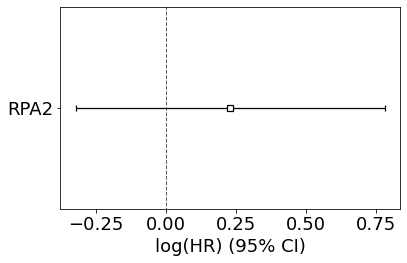

In [10]:
patient_columns = ["RFS_MONTHS", "RFS_STATUS"]

cph = CoxPHFitter()
cph.fit(
    df_tmp[analysis_targets + patient_columns],
    duration_col="RFS_MONTHS",
    event_col="RFS_STATUS",
    show_progress=True,
)
plt.rcParams["font.size"] = 18
cph.print_summary()
cph.plot()
plt.tight_layout()
# functions.make_dir("{0}/LumA".format(config.FIGURES_LIFELINES_RECURRENCE_DIR))
# plt.savefig("{0}/LumA/cph.png".format(config.FIGURES_LIFELINES_RECURRENCE_DIR))

In [ ]:
sns.histplot(
    x="STAT5B", data=df_cross, hue="OS_15years", palette={0: "blue", 1: "Orange"}
)